In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interp

# Running main yielded experimental results, including fpr, tpr, precision, recall, auc, and aupr for five-fold cross-validation

In [2]:
fprs=[[0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00373134, 0.00373134, 0.00746269, 0.00746269, 0.01119403,
       0.01119403, 0.01492537, 0.01492537, 0.01865672, 0.01865672,
       0.02238806, 0.02238806, 0.0261194 , 0.0261194 , 0.03358209,
       0.03358209, 0.04477612, 0.04477612, 0.04850746, 0.04850746,
       0.05223881, 0.05223881, 0.05970149, 0.05970149, 0.06716418,
       0.06716418, 0.08955224, 0.08955224, 0.09328358, 0.09328358,
       0.09701493, 0.09701493, 0.11940299, 0.11940299, 0.12313433,
       0.12313433, 0.12686567, 0.12686567, 0.14552239, 0.14552239,
       0.15671642, 0.15671642, 0.1641791 , 0.1641791 , 0.19029851,
       0.19029851, 0.19402985, 0.19402985, 0.20522388, 0.20522388,
       0.20895522, 0.20895522, 0.22014925, 0.22014925, 0.23507463,
       0.23507463, 0.31343284, 0.31343284, 1.        ], [0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00384615, 0.00769231, 0.00769231, 0.01538462,
       0.01538462, 0.02307692, 0.02307692, 0.02692308, 0.02692308,
       0.03076923, 0.03076923, 0.03461538, 0.03461538, 0.03846154,
       0.03846154, 0.04230769, 0.04230769, 0.04615385, 0.04615385,
       0.05      , 0.05      , 0.05384615, 0.05384615, 0.07692308,
       0.07692308, 0.08076923, 0.08076923, 0.08461538, 0.08461538,
       0.11538462, 0.11538462, 0.12307692, 0.12307692, 0.13846154,
       0.13846154, 0.14230769, 0.14230769, 0.16923077, 0.16923077,
       0.17307692, 0.17307692, 0.17692308, 0.17692308, 0.18076923,
       0.18076923, 0.19230769, 0.19230769, 0.2       , 0.2       ,
       0.20384615, 0.20384615, 0.21153846, 0.21153846, 0.21923077,
       0.21923077, 0.31153846, 0.31153846, 0.31923077, 0.31923077,
       1.        ], [0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00381679,
       0.00381679, 0.00763359, 0.00763359, 0.01526718, 0.01526718,
       0.02290076, 0.02290076, 0.02671756, 0.02671756, 0.03053435,
       0.03053435, 0.03816794, 0.03816794, 0.04198473, 0.04198473,
       0.04961832, 0.04961832, 0.05343511, 0.05343511, 0.05725191,
       0.05725191, 0.0610687 , 0.0610687 , 0.0648855 , 0.0648855 ,
       0.06870229, 0.06870229, 0.07251908, 0.07251908, 0.09160305,
       0.09160305, 0.09541985, 0.09541985, 0.10305344, 0.10305344,
       0.11450382, 0.11450382, 0.17175573, 0.17175573, 0.17938931,
       0.17938931, 0.19465649, 0.19465649, 0.23664122, 0.23664122,
       0.24427481, 0.24427481, 0.27480916, 0.27480916, 0.29389313,
       0.29389313, 0.29770992, 0.29770992, 0.30916031, 0.30916031,
       0.36641221, 0.36641221, 0.51526718, 0.51526718, 0.57251908,
       0.57251908, 0.72900763, 0.72900763, 0.74045802, 0.74045802,
       0.75572519, 0.75572519, 0.77862595, 0.77862595, 1.        ], [0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00328947, 0.00328947, 0.00657895, 0.00657895, 0.00986842,
       0.00986842, 0.01315789, 0.01315789, 0.01644737, 0.01644737,
       0.02960526, 0.02960526, 0.03289474, 0.03289474, 0.03618421,
       0.03618421, 0.03947368, 0.03947368, 0.04276316, 0.04276316,
       0.04934211, 0.04934211, 0.0625    , 0.0625    , 0.06907895,
       0.06907895, 0.07565789, 0.07565789, 0.08552632, 0.08552632,
       0.09539474, 0.09539474, 0.09868421, 0.09868421, 0.10197368,
       0.10197368, 0.10855263, 0.10855263, 0.125     , 0.125     ,
       0.12828947, 0.12828947, 0.18421053, 0.18421053, 0.19078947,
       0.19078947, 0.20394737, 0.20394737, 0.21710526, 0.21710526,
       0.23026316, 0.23026316, 0.26973684, 0.26973684, 0.27302632,
       0.27302632, 0.29276316, 0.29276316, 0.30592105, 0.30592105,
       0.38486842, 0.38486842, 0.40789474, 0.40789474, 0.45394737,
       0.45394737, 0.45723684, 0.45723684, 0.62828947, 0.62828947,
       0.65131579, 0.65131579, 1.        ], [0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.0034965 , 0.0034965 , 0.00699301,
       0.00699301, 0.01048951, 0.01048951, 0.01398601, 0.01398601,
       0.01748252, 0.01748252, 0.02097902, 0.02097902, 0.03146853,
       0.03146853, 0.03496503, 0.03496503, 0.03846154, 0.03846154,
       0.04195804, 0.04195804, 0.04545455, 0.04545455, 0.05244755,
       0.05244755, 0.05594406, 0.05594406, 0.06643357, 0.06643357,
       0.07692308, 0.07692308, 0.08391608, 0.08391608, 0.22027972,
       0.22027972, 0.22377622, 0.22377622, 0.30769231, 0.30769231,
       0.31118881, 0.31118881, 1.        ]]
tprs=[[0.        , 0.00352113, 0.01056338, 0.07042254, 0.07746479,
       0.26408451, 0.27112676, 0.37676056, 0.38380282, 0.63732394,
       0.63732394, 0.65492958, 0.65492958, 0.6584507 , 0.6584507 ,
       0.69366197, 0.69366197, 0.74647887, 0.74647887, 0.76056338,
       0.76056338, 0.83802817, 0.83802817, 0.84507042, 0.84507042,
       0.84859155, 0.84859155, 0.85211268, 0.85211268, 0.8556338 ,
       0.8556338 , 0.86619718, 0.86619718, 0.9084507 , 0.9084507 ,
       0.91549296, 0.91549296, 0.92957746, 0.92957746, 0.93661972,
       0.93661972, 0.94366197, 0.94366197, 0.9471831 , 0.9471831 ,
       0.95070423, 0.95070423, 0.95422535, 0.95422535, 0.96126761,
       0.96126761, 0.96478873, 0.96478873, 0.96830986, 0.96830986,
       0.97183099, 0.97183099, 0.97535211, 0.97535211, 0.97887324,
       0.97887324, 0.98591549, 0.98591549, 0.98943662, 0.98943662,
       0.99295775, 0.99295775, 1.        , 1.        ], [0.        , 0.00342466, 0.01027397, 0.05821918, 0.06506849,
       0.10958904, 0.1130137 , 0.1130137 , 0.5890411 , 0.5890411 ,
       0.59931507, 0.59931507, 0.73630137, 0.73630137, 0.73972603,
       0.73972603, 0.75      , 0.75      , 0.77054795, 0.77054795,
       0.79109589, 0.79109589, 0.80479452, 0.80479452, 0.85616438,
       0.85616438, 0.8630137 , 0.8630137 , 0.89041096, 0.89041096,
       0.9109589 , 0.9109589 , 0.92123288, 0.92123288, 0.93150685,
       0.93150685, 0.93493151, 0.93493151, 0.94520548, 0.94520548,
       0.94863014, 0.94863014, 0.95547945, 0.95547945, 0.95890411,
       0.95890411, 0.96575342, 0.96575342, 0.96917808, 0.96917808,
       0.9760274 , 0.9760274 , 0.97945205, 0.97945205, 0.98287671,
       0.98287671, 0.98630137, 0.98630137, 0.98972603, 0.98972603,
       0.99315068, 0.99315068, 0.99657534, 0.99657534, 1.        ,
       1.        ], [0.        , 0.00344828, 0.0137931 , 0.02068966, 0.12068966,
       0.12758621, 0.48965517, 0.49655172, 0.77241379, 0.77241379,
       0.77586207, 0.77586207, 0.77931034, 0.77931034, 0.78275862,
       0.78275862, 0.7862069 , 0.7862069 , 0.8       , 0.8       ,
       0.83793103, 0.83793103, 0.84482759, 0.84482759, 0.84827586,
       0.84827586, 0.85172414, 0.85172414, 0.85517241, 0.85517241,
       0.86551724, 0.86551724, 0.87586207, 0.87586207, 0.89310345,
       0.89310345, 0.90689655, 0.90689655, 0.91034483, 0.91034483,
       0.91724138, 0.91724138, 0.92413793, 0.92413793, 0.93103448,
       0.93103448, 0.93793103, 0.93793103, 0.94137931, 0.94137931,
       0.94827586, 0.94827586, 0.95172414, 0.95172414, 0.95517241,
       0.95517241, 0.95862069, 0.95862069, 0.96206897, 0.96206897,
       0.96551724, 0.96551724, 0.96896552, 0.96896552, 0.97241379,
       0.97241379, 0.97931034, 0.97931034, 0.98275862, 0.98275862,
       0.9862069 , 0.9862069 , 0.98965517, 0.98965517, 0.99310345,
       0.99310345, 0.99655172, 0.99655172, 1.        , 1.        ], [0.        , 0.00403226, 0.25      , 0.25806452, 0.62903226,
       0.62903226, 0.70564516, 0.70564516, 0.77016129, 0.77016129,
       0.78225806, 0.78225806, 0.78629032, 0.78629032, 0.79435484,
       0.79435484, 0.81451613, 0.81451613, 0.84677419, 0.84677419,
       0.85080645, 0.85080645, 0.85483871, 0.85483871, 0.85887097,
       0.85887097, 0.87096774, 0.87096774, 0.88306452, 0.88306452,
       0.88709677, 0.88709677, 0.89112903, 0.89112903, 0.90322581,
       0.90322581, 0.90725806, 0.90725806, 0.91532258, 0.91532258,
       0.91935484, 0.91935484, 0.9233871 , 0.9233871 , 0.92741935,
       0.92741935, 0.93548387, 0.93548387, 0.93951613, 0.93951613,
       0.94354839, 0.94354839, 0.94758065, 0.94758065, 0.95564516,
       0.95564516, 0.95967742, 0.95967742, 0.96370968, 0.96370968,
       0.96774194, 0.96774194, 0.97177419, 0.97177419, 0.97580645,
       0.97580645, 0.97983871, 0.97983871, 0.98387097, 0.98387097,
       0.98790323, 0.98790323, 0.99193548, 0.99193548, 0.99596774,
       0.99596774, 1.        , 1.        ], [0.        , 0.0037594 , 0.0112782 , 0.04135338, 0.05263158,
       0.06766917, 0.07518797, 0.10902256, 0.11654135, 0.21052632,
       0.21804511, 0.66917293, 0.66917293, 0.68796992, 0.68796992,
       0.72932331, 0.72932331, 0.7443609 , 0.7443609 , 0.7481203 ,
       0.7481203 , 0.76315789, 0.76315789, 0.76691729, 0.76691729,
       0.77067669, 0.77067669, 0.81578947, 0.81578947, 0.83458647,
       0.83458647, 0.89473684, 0.89473684, 0.91353383, 0.91353383,
       0.92857143, 0.92857143, 0.94736842, 0.94736842, 0.95112782,
       0.95112782, 0.96992481, 0.96992481, 0.98496241, 0.98496241,
       0.9887218 , 0.9887218 , 0.9924812 , 0.9924812 , 0.9962406 ,
       0.9962406 , 1.        , 1.        ]]

precisions=[[0.51449275, 0.5154265 , 0.51636364, 0.51730419, 0.51824818,
       0.51919561, 0.52014652, 0.52110092, 0.52205882, 0.52302026,
       0.52398524, 0.52495379, 0.52592593, 0.52690167, 0.52788104,
       0.52886406, 0.52985075, 0.53084112, 0.53183521, 0.53283302,
       0.53383459, 0.53483992, 0.53584906, 0.536862  , 0.53787879,
       0.53889943, 0.53992395, 0.54095238, 0.54198473, 0.54302103,
       0.5440613 , 0.54510557, 0.54615385, 0.54720617, 0.54826255,
       0.54932302, 0.5503876 , 0.55145631, 0.55252918, 0.55360624,
       0.5546875 , 0.55577299, 0.55686275, 0.55795678, 0.55905512,
       0.56015779, 0.56126482, 0.56237624, 0.56349206, 0.56461233,
       0.56573705, 0.56686627, 0.568     , 0.56913828, 0.57028112,
       0.57142857, 0.57258065, 0.57373737, 0.57489879, 0.57606491,
       0.57723577, 0.57841141, 0.57959184, 0.5807771 , 0.58196721,
       0.58316222, 0.58436214, 0.58556701, 0.58677686, 0.58799172,
       0.58921162, 0.59043659, 0.59166667, 0.59290188, 0.59414226,
       0.59538784, 0.59663866, 0.59789474, 0.59915612, 0.60042283,
       0.60169492, 0.6029724 , 0.60425532, 0.60554371, 0.60683761,
       0.60813704, 0.60944206, 0.61075269, 0.61206897, 0.61339093,
       0.61471861, 0.61605206, 0.6173913 , 0.61873638, 0.62008734,
       0.6214442 , 0.62280702, 0.62417582, 0.62555066, 0.62693157,
       0.62831858, 0.62971175, 0.63111111, 0.6325167 , 0.63392857,
       0.63534676, 0.6367713 , 0.63820225, 0.63963964, 0.64108352,
       0.64253394, 0.64399093, 0.64545455, 0.64692483, 0.64840183,
       0.64988558, 0.65137615, 0.65287356, 0.65437788, 0.65588915,
       0.65740741, 0.65893271, 0.66046512, 0.66200466, 0.6635514 ,
       0.66510539, 0.66666667, 0.66823529, 0.66981132, 0.6713948 ,
       0.67298578, 0.67458432, 0.67619048, 0.6778043 , 0.67942584,
       0.68105516, 0.68269231, 0.68433735, 0.68599034, 0.68765133,
       0.68932039, 0.69099757, 0.69268293, 0.69437653, 0.69607843,
       0.6977887 , 0.69950739, 0.70123457, 0.7029703 , 0.70471464,
       0.70646766, 0.70822943, 0.71      , 0.71177945, 0.71356784,
       0.71536524, 0.71717172, 0.71898734, 0.72081218, 0.72264631,
       0.7244898 , 0.72634271, 0.72820513, 0.73007712, 0.73195876,
       0.73385013, 0.7357513 , 0.73766234, 0.73958333, 0.74151436,
       0.7434555 , 0.74540682, 0.74736842, 0.74934037, 0.75132275,
       0.75331565, 0.75531915, 0.75733333, 0.75935829, 0.7613941 ,
       0.76344086, 0.76549865, 0.76756757, 0.7696477 , 0.77173913,
       0.77111717, 0.7704918 , 0.77260274, 0.77472527, 0.7768595 ,
       0.77900552, 0.78116343, 0.78333333, 0.78551532, 0.7877095 ,
       0.78991597, 0.79213483, 0.7943662 , 0.79661017, 0.79886686,
       0.80113636, 0.8034188 , 0.80571429, 0.80802292, 0.81034483,
       0.81268012, 0.8150289 , 0.8173913 , 0.81686047, 0.81924198,
       0.82163743, 0.82404692, 0.82647059, 0.8259587 , 0.82840237,
       0.83086053, 0.83333333, 0.83283582, 0.83233533, 0.83483483,
       0.83433735, 0.83685801, 0.83939394, 0.84194529, 0.84146341,
       0.8440367 , 0.84355828, 0.84615385, 0.84876543, 0.85139319,
       0.85403727, 0.85669782, 0.859375  , 0.86206897, 0.86163522,
       0.86435331, 0.86708861, 0.86666667, 0.86942675, 0.87220447,
       0.875     , 0.87459807, 0.87419355, 0.87702265, 0.87987013,
       0.88273616, 0.88562092, 0.88852459, 0.88815789, 0.89108911,
       0.89072848, 0.89368771, 0.89333333, 0.89632107, 0.89932886,
       0.9023569 , 0.90540541, 0.90847458, 0.91156463, 0.9112628 ,
       0.9109589 , 0.91408935, 0.9137931 , 0.91349481, 0.91666667,
       0.91637631, 0.91608392, 0.91578947, 0.91549296, 0.91872792,
       0.92198582, 0.9252669 , 0.92857143, 0.93189964, 0.9352518 ,
       0.93501805, 0.93478261, 0.93818182, 0.94160584, 0.94139194,
       0.94117647, 0.94095941, 0.94074074, 0.94052045, 0.94029851,
       0.94007491, 0.93984962, 0.93962264, 0.93939394, 0.9391635 ,
       0.9389313 , 0.94252874, 0.94615385, 0.94594595, 0.94573643,
       0.94552529, 0.94921875, 0.94901961, 0.95275591, 0.95256917,
       0.95634921, 0.96015936, 0.964     , 0.96385542, 0.96774194,
       0.97165992, 0.97154472, 0.97142857, 0.97540984, 0.97530864,
       0.97520661, 0.97510373, 0.975     , 0.9748954 , 0.97478992,
       0.97468354, 0.97457627, 0.97446809, 0.97435897, 0.97424893,
       0.97413793, 0.97402597, 0.97391304, 0.97379913, 0.97368421,
       0.97356828, 0.97345133, 0.97333333, 0.97321429, 0.97309417,
       0.97297297, 0.97737557, 0.97727273, 0.97716895, 0.97706422,
       0.97695853, 0.98148148, 0.98139535, 0.98130841, 0.98122066,
       0.98113208, 0.98104265, 0.98095238, 0.98086124, 0.98076923,
       0.98067633, 0.98058252, 0.9804878 , 0.98039216, 0.98029557,
       0.98019802, 0.9800995 , 0.985     , 0.98492462, 0.98484848,
       0.98477157, 0.98469388, 0.98461538, 0.98453608, 0.98445596,
       0.984375  , 0.98429319, 0.98421053, 0.98941799, 0.9893617 ,
       0.99465241, 0.99462366, 0.99459459, 0.99456522, 0.99453552,
       0.99450549, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        ], [0.52898551, 0.52994555, 0.53090909, 0.53187614, 0.53284672,
       0.53382084, 0.53479853, 0.53577982, 0.53676471, 0.53775322,
       0.53874539, 0.53974122, 0.54074074, 0.54174397, 0.54275093,
       0.54376164, 0.54477612, 0.54579439, 0.54681648, 0.5478424 ,
       0.54887218, 0.54990584, 0.5509434 , 0.55198488, 0.5530303 ,
       0.5540797 , 0.55513308, 0.55619048, 0.55725191, 0.5583174 ,
       0.55938697, 0.56046065, 0.56153846, 0.56262042, 0.56370656,
       0.56479691, 0.56589147, 0.56699029, 0.56809339, 0.56920078,
       0.5703125 , 0.57142857, 0.57254902, 0.57367387, 0.57480315,
       0.57593688, 0.5770751 , 0.57821782, 0.57936508, 0.5805169 ,
       0.58167331, 0.58283433, 0.584     , 0.58517034, 0.58634538,
       0.58752515, 0.58870968, 0.58989899, 0.59109312, 0.59229209,
       0.59349593, 0.59470468, 0.59591837, 0.59713701, 0.59836066,
       0.59958932, 0.60082305, 0.60206186, 0.60330579, 0.60455487,
       0.60580913, 0.60706861, 0.60833333, 0.60960334, 0.61087866,
       0.61215933, 0.61344538, 0.61473684, 0.61603376, 0.61733615,
       0.61864407, 0.61995754, 0.6212766 , 0.62260128, 0.62393162,
       0.62526767, 0.62660944, 0.62795699, 0.62931034, 0.63066955,
       0.63203463, 0.63340564, 0.63478261, 0.63616558, 0.63755459,
       0.63894967, 0.64035088, 0.64175824, 0.64317181, 0.64459161,
       0.6460177 , 0.64745011, 0.64888889, 0.65033408, 0.65178571,
       0.65324385, 0.65470852, 0.65617978, 0.65765766, 0.65914221,
       0.66063348, 0.66213152, 0.66363636, 0.66514806, 0.66666667,
       0.66819222, 0.66972477, 0.67126437, 0.67281106, 0.6743649 ,
       0.67592593, 0.6774942 , 0.67906977, 0.68065268, 0.68224299,
       0.68384075, 0.68544601, 0.68705882, 0.68867925, 0.69030733,
       0.69194313, 0.6935867 , 0.6952381 , 0.69689737, 0.69856459,
       0.70023981, 0.70192308, 0.70361446, 0.70531401, 0.70702179,
       0.70873786, 0.71046229, 0.71219512, 0.71393643, 0.71568627,
       0.71744472, 0.71921182, 0.72098765, 0.72277228, 0.72456576,
       0.72636816, 0.72817955, 0.73      , 0.73182957, 0.73366834,
       0.73551637, 0.73737374, 0.73924051, 0.74111675, 0.74300254,
       0.74489796, 0.74680307, 0.74871795, 0.75064267, 0.75257732,
       0.75452196, 0.75647668, 0.75844156, 0.76041667, 0.76240209,
       0.76439791, 0.7664042 , 0.76842105, 0.77044855, 0.77248677,
       0.77453581, 0.77659574, 0.77866667, 0.77807487, 0.78016086,
       0.78225806, 0.78167116, 0.78378378, 0.78590786, 0.78804348,
       0.79019074, 0.79234973, 0.79452055, 0.7967033 , 0.79889807,
       0.80110497, 0.8033241 , 0.80555556, 0.80779944, 0.81005587,
       0.81232493, 0.81460674, 0.81690141, 0.81920904, 0.82152975,
       0.82386364, 0.82621083, 0.82857143, 0.83094556, 0.83333333,
       0.83573487, 0.83526012, 0.83768116, 0.84011628, 0.83965015,
       0.84210526, 0.84457478, 0.84411765, 0.84660767, 0.84615385,
       0.84866469, 0.85119048, 0.85074627, 0.85329341, 0.85585586,
       0.85843373, 0.85800604, 0.85757576, 0.86018237, 0.8597561 ,
       0.86238532, 0.86196319, 0.86153846, 0.86419753, 0.86377709,
       0.86645963, 0.86915888, 0.871875  , 0.87460815, 0.87735849,
       0.88012618, 0.88291139, 0.88253968, 0.88216561, 0.88498403,
       0.88461538, 0.88745981, 0.89032258, 0.89320388, 0.8961039 ,
       0.89576547, 0.89542484, 0.89508197, 0.89802632, 0.9009901 ,
       0.90066225, 0.90365449, 0.90666667, 0.909699  , 0.91275168,
       0.91582492, 0.91891892, 0.9220339 , 0.92517007, 0.92491468,
       0.92465753, 0.92439863, 0.92758621, 0.92733564, 0.92708333,
       0.92682927, 0.93006993, 0.92982456, 0.92957746, 0.92932862,
       0.92907801, 0.92882562, 0.92857143, 0.93189964, 0.9352518 ,
       0.93862816, 0.94202899, 0.94545455, 0.94890511, 0.94871795,
       0.94852941, 0.94833948, 0.94814815, 0.94795539, 0.94776119,
       0.94756554, 0.94736842, 0.9509434 , 0.95075758, 0.95057034,
       0.95419847, 0.95402299, 0.95384615, 0.95366795, 0.95348837,
       0.95330739, 0.953125  , 0.95294118, 0.95275591, 0.95256917,
       0.95238095, 0.95219124, 0.952     , 0.95180723, 0.9516129 ,
       0.951417  , 0.95528455, 0.95510204, 0.95491803, 0.95473251,
       0.95454545, 0.95850622, 0.95833333, 0.958159  , 0.95798319,
       0.95780591, 0.95762712, 0.95744681, 0.96153846, 0.96137339,
       0.9612069 , 0.96103896, 0.96086957, 0.96069869, 0.96052632,
       0.96475771, 0.96460177, 0.96444444, 0.96428571, 0.96860987,
       0.96846847, 0.97285068, 0.97272727, 0.97260274, 0.97247706,
       0.97235023, 0.97222222, 0.97209302, 0.97196262, 0.97183099,
       0.97169811, 0.97156398, 0.97142857, 0.97129187, 0.97115385,
       0.97101449, 0.97087379, 0.97073171, 0.97058824, 0.97044335,
       0.97029703, 0.97014925, 0.97      , 0.96984925, 0.96969697,
       0.96954315, 0.96938776, 0.96923077, 0.96907216, 0.96891192,
       0.96875   , 0.96858639, 0.96842105, 0.96825397, 0.96808511,
       0.96791444, 0.96774194, 0.96756757, 0.9673913 , 0.96721311,
       0.96703297, 0.96685083, 0.97222222, 0.97765363, 0.97752809,
       0.97740113, 0.97727273, 0.98285714, 0.98850575, 0.98843931,
       0.98837209, 0.98830409, 0.98823529, 0.98816568, 0.98809524,
       0.98802395, 0.98795181, 0.98787879, 0.98780488, 0.98773006,
       0.98765432, 0.98757764, 0.9875    , 0.98742138, 0.98734177,
       0.98726115, 0.98717949, 0.98709677, 0.98701299, 0.9869281 ,
       0.98684211, 0.98675497, 0.98666667, 0.98657718, 0.98648649,
       0.98639456, 0.98630137, 0.9862069 , 0.98611111, 0.98601399,
       0.98591549, 0.9858156 , 0.98571429, 0.98561151, 0.98550725,
       0.98540146, 0.98529412, 0.98518519, 0.98507463, 0.98496241,
       0.98484848, 0.98473282, 0.98461538, 0.98449612, 0.984375  ,
       0.98425197, 0.98412698, 0.984     , 0.98387097, 0.98373984,
       0.98360656, 0.98347107, 0.98333333, 0.98319328, 0.98305085,
       0.98290598, 0.98275862, 0.9826087 , 0.98245614, 0.98230088,
       0.98214286, 0.98198198, 0.98181818, 0.98165138, 0.98148148,
       0.98130841, 0.98113208, 0.98095238, 0.98076923, 0.98058252,
       0.98039216, 0.98019802, 0.98      , 0.97979798, 0.97959184,
       0.97938144, 0.97916667, 0.97894737, 0.9787234 , 0.97849462,
       0.97826087, 0.97802198, 0.97777778, 0.97752809, 0.97727273,
       0.97701149, 0.97674419, 0.97647059, 0.97619048, 0.97590361,
       0.97560976, 0.97530864, 0.975     , 0.97468354, 0.97435897,
       0.97402597, 0.97368421, 0.97333333, 0.97297297, 0.97260274,
       0.97222222, 0.97183099, 0.97142857, 0.97101449, 0.97058824,
       0.97014925, 0.96969697, 0.96923077, 0.96875   , 0.96825397,
       0.96774194, 0.96721311, 0.96666667, 0.96610169, 0.96551724,
       0.96491228, 0.96428571, 0.96363636, 0.96296296, 0.96226415,
       0.96153846, 0.96078431, 0.96      , 0.95918367, 0.95833333,
       0.95744681, 0.95652174, 0.95555556, 0.95454545, 0.95348837,
       0.95238095, 0.95121951, 0.95      , 0.94871795, 0.94736842,
       0.94594595, 0.94444444, 0.94285714, 0.97058824, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ], [0.52536232, 0.52631579, 0.52727273, 0.52823315, 0.52919708,
       0.53016453, 0.53113553, 0.53211009, 0.53308824, 0.53406998,
       0.53505535, 0.53604436, 0.53703704, 0.5380334 , 0.53903346,
       0.54003724, 0.54104478, 0.54205607, 0.54307116, 0.54409006,
       0.54511278, 0.54613936, 0.54716981, 0.54820416, 0.54924242,
       0.55028463, 0.5513308 , 0.55238095, 0.55343511, 0.55449331,
       0.55555556, 0.55662188, 0.55769231, 0.55876686, 0.55984556,
       0.56092843, 0.5620155 , 0.5631068 , 0.56420233, 0.56530214,
       0.56640625, 0.56751468, 0.56862745, 0.5697446 , 0.57086614,
       0.57199211, 0.57312253, 0.57425743, 0.57539683, 0.57654076,
       0.57768924, 0.57884232, 0.58      , 0.58116232, 0.58232932,
       0.58350101, 0.58467742, 0.58585859, 0.58704453, 0.5862069 ,
       0.58739837, 0.5885947 , 0.58979592, 0.59100204, 0.59221311,
       0.59342916, 0.59259259, 0.59381443, 0.59504132, 0.59627329,
       0.59751037, 0.5966736 , 0.59791667, 0.59916493, 0.60041841,
       0.59958071, 0.60084034, 0.60210526, 0.60337553, 0.60465116,
       0.6059322 , 0.60721868, 0.60851064, 0.6098081 , 0.61111111,
       0.6124197 , 0.61373391, 0.61505376, 0.61637931, 0.61771058,
       0.61904762, 0.62039046, 0.62173913, 0.62309368, 0.62445415,
       0.62582057, 0.62719298, 0.62857143, 0.62995595, 0.63134658,
       0.63274336, 0.63414634, 0.63555556, 0.63697105, 0.63839286,
       0.63982103, 0.64125561, 0.64269663, 0.64414414, 0.64559819,
       0.64705882, 0.64852608, 0.65      , 0.65148064, 0.65296804,
       0.65446224, 0.6559633 , 0.65517241, 0.65668203, 0.65819861,
       0.65972222, 0.6612529 , 0.6627907 , 0.66433566, 0.66588785,
       0.66744731, 0.66901408, 0.67058824, 0.67216981, 0.67375887,
       0.67535545, 0.67695962, 0.67857143, 0.6778043 , 0.67942584,
       0.68105516, 0.68269231, 0.68433735, 0.68599034, 0.68765133,
       0.68932039, 0.69099757, 0.69268293, 0.69437653, 0.69607843,
       0.6977887 , 0.69950739, 0.70123457, 0.7029703 , 0.70471464,
       0.70646766, 0.70822943, 0.71      , 0.71177945, 0.71356784,
       0.71536524, 0.71717172, 0.71898734, 0.72081218, 0.72264631,
       0.7244898 , 0.72634271, 0.72820513, 0.73007712, 0.73195876,
       0.73385013, 0.7357513 , 0.73766234, 0.73958333, 0.74151436,
       0.7434555 , 0.74540682, 0.74736842, 0.74670185, 0.74603175,
       0.74801061, 0.75      , 0.752     , 0.7540107 , 0.75603217,
       0.75806452, 0.76010782, 0.76216216, 0.76422764, 0.76630435,
       0.76839237, 0.7704918 , 0.77260274, 0.77472527, 0.7768595 ,
       0.77624309, 0.77839335, 0.78055556, 0.78272981, 0.78212291,
       0.78431373, 0.78370787, 0.78591549, 0.78813559, 0.79036827,
       0.79261364, 0.79487179, 0.79428571, 0.7965616 , 0.79885057,
       0.80115274, 0.80346821, 0.8057971 , 0.80813953, 0.81049563,
       0.8128655 , 0.81231672, 0.81470588, 0.81710914, 0.81656805,
       0.8189911 , 0.82142857, 0.8238806 , 0.82634731, 0.82882883,
       0.8313253 , 0.83383686, 0.83636364, 0.83890578, 0.84146341,
       0.8440367 , 0.84355828, 0.84615385, 0.84876543, 0.85139319,
       0.85403727, 0.85358255, 0.853125  , 0.85579937, 0.85849057,
       0.85804416, 0.86075949, 0.86349206, 0.86624204, 0.86900958,
       0.87179487, 0.87459807, 0.87741935, 0.8802589 , 0.88311688,
       0.88599349, 0.88888889, 0.89180328, 0.89473684, 0.89768977,
       0.90066225, 0.90033223, 0.9       , 0.90301003, 0.90604027,
       0.90909091, 0.90878378, 0.90847458, 0.91156463, 0.91467577,
       0.91438356, 0.91408935, 0.91724138, 0.91695502, 0.91666667,
       0.91986063, 0.92307692, 0.92631579, 0.92957746, 0.93286219,
       0.93262411, 0.93594306, 0.93571429, 0.93548387, 0.9352518 ,
       0.93501805, 0.9384058 , 0.93818182, 0.9379562 , 0.93772894,
       0.9375    , 0.93726937, 0.94074074, 0.94052045, 0.94029851,
       0.94007491, 0.94360902, 0.94339623, 0.94318182, 0.94296578,
       0.94656489, 0.94636015, 0.95      , 0.94980695, 0.95348837,
       0.95719844, 0.95703125, 0.96078431, 0.96062992, 0.96047431,
       0.96428571, 0.96812749, 0.968     , 0.96787149, 0.96774194,
       0.96761134, 0.96747967, 0.96734694, 0.96721311, 0.96707819,
       0.96694215, 0.96680498, 0.96666667, 0.9707113 , 0.97058824,
       0.97046414, 0.97033898, 0.97021277, 0.97435897, 0.97424893,
       0.97844828, 0.98268398, 0.9826087 , 0.98689956, 0.99122807,
       0.99118943, 0.99557522, 0.99555556, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ], [0.44927536, 0.45009074, 0.45090909, 0.45173042, 0.45255474,
       0.45338208, 0.45421245, 0.45504587, 0.45588235, 0.45672192,
       0.45756458, 0.45841035, 0.45925926, 0.46011132, 0.46096654,
       0.46182495, 0.46268657, 0.4635514 , 0.46441948, 0.46529081,
       0.46616541, 0.46704331, 0.46792453, 0.46880907, 0.46969697,
       0.47058824, 0.47148289, 0.47238095, 0.47328244, 0.47418738,
       0.47509579, 0.47600768, 0.47692308, 0.477842  , 0.47876448,
       0.47969052, 0.48062016, 0.4815534 , 0.48249027, 0.4834308 ,
       0.484375  , 0.4853229 , 0.48627451, 0.48722986, 0.48818898,
       0.48915187, 0.49011858, 0.49108911, 0.49206349, 0.49304175,
       0.4940239 , 0.49500998, 0.496     , 0.49699399, 0.49799197,
       0.49899396, 0.5       , 0.5010101 , 0.50202429, 0.5030426 ,
       0.50406504, 0.50509165, 0.50612245, 0.50715746, 0.50819672,
       0.50924025, 0.51028807, 0.51134021, 0.51239669, 0.51345756,
       0.51452282, 0.51559252, 0.51666667, 0.5177453 , 0.51882845,
       0.51991614, 0.5210084 , 0.52210526, 0.52320675, 0.5243129 ,
       0.52542373, 0.52653928, 0.52765957, 0.52878465, 0.52991453,
       0.53104925, 0.53218884, 0.53333333, 0.53448276, 0.53563715,
       0.53679654, 0.53796095, 0.53913043, 0.54030501, 0.54148472,
       0.54266958, 0.54385965, 0.54505495, 0.54625551, 0.54746137,
       0.54867257, 0.54988914, 0.55111111, 0.55233853, 0.55357143,
       0.55480984, 0.55605381, 0.55505618, 0.55630631, 0.55756208,
       0.55882353, 0.5600907 , 0.56136364, 0.56264237, 0.56392694,
       0.56292906, 0.56422018, 0.56551724, 0.56682028, 0.56812933,
       0.56944444, 0.57076566, 0.57209302, 0.57342657, 0.57476636,
       0.57611241, 0.57746479, 0.57882353, 0.58018868, 0.58156028,
       0.58293839, 0.58432304, 0.58571429, 0.58711217, 0.58851675,
       0.58992806, 0.59134615, 0.59277108, 0.5942029 , 0.59564165,
       0.59708738, 0.59854015, 0.6       , 0.60146699, 0.60294118,
       0.6044226 , 0.60591133, 0.60740741, 0.60891089, 0.61042184,
       0.6119403 , 0.61346633, 0.615     , 0.61654135, 0.61809045,
       0.61964736, 0.62121212, 0.62278481, 0.62436548, 0.6259542 ,
       0.62755102, 0.62915601, 0.63076923, 0.63239075, 0.63402062,
       0.63565891, 0.6373057 , 0.63896104, 0.63802083, 0.63968668,
       0.63874346, 0.64041995, 0.64210526, 0.64379947, 0.64550265,
       0.64721485, 0.64893617, 0.65066667, 0.65240642, 0.6541555 ,
       0.65591398, 0.65768194, 0.65945946, 0.66124661, 0.66304348,
       0.66212534, 0.66393443, 0.66575342, 0.66758242, 0.66942149,
       0.67127072, 0.67313019, 0.675     , 0.67409471, 0.67597765,
       0.67787115, 0.67977528, 0.68169014, 0.68361582, 0.68555241,
       0.6875    , 0.68945869, 0.69142857, 0.69340974, 0.6954023 ,
       0.69740634, 0.69942197, 0.70144928, 0.70348837, 0.70553936,
       0.70760234, 0.70967742, 0.71176471, 0.71386431, 0.71597633,
       0.71810089, 0.7202381 , 0.72238806, 0.72155689, 0.72372372,
       0.72590361, 0.72809668, 0.73030303, 0.72948328, 0.73170732,
       0.73394495, 0.73619632, 0.73846154, 0.74074074, 0.74303406,
       0.74223602, 0.74454829, 0.74375   , 0.7460815 , 0.74842767,
       0.75078864, 0.75316456, 0.75555556, 0.75796178, 0.76038339,
       0.76282051, 0.76527331, 0.76774194, 0.77022654, 0.77272727,
       0.77198697, 0.7745098 , 0.77704918, 0.77960526, 0.78217822,
       0.78145695, 0.7807309 , 0.78333333, 0.78595318, 0.7885906 ,
       0.79124579, 0.79054054, 0.79322034, 0.79591837, 0.79863481,
       0.80136986, 0.80068729, 0.80344828, 0.80622837, 0.80555556,
       0.80836237, 0.81118881, 0.81403509, 0.81690141, 0.81978799,
       0.82269504, 0.82562278, 0.82857143, 0.83154122, 0.83453237,
       0.83754513, 0.84057971, 0.84363636, 0.84671533, 0.84981685,
       0.85294118, 0.85608856, 0.85555556, 0.85501859, 0.85820896,
       0.8576779 , 0.86090226, 0.86415094, 0.86742424, 0.87072243,
       0.8740458 , 0.87356322, 0.87692308, 0.88030888, 0.87984496,
       0.88326848, 0.8828125 , 0.88235294, 0.88582677, 0.88537549,
       0.88888889, 0.89243028, 0.896     , 0.89558233, 0.89516129,
       0.89473684, 0.89837398, 0.90204082, 0.9057377 , 0.90534979,
       0.90909091, 0.91286307, 0.9125    , 0.91631799, 0.92016807,
       0.91983122, 0.91949153, 0.91914894, 0.92307692, 0.92703863,
       0.93103448, 0.93506494, 0.93478261, 0.93449782, 0.93421053,
       0.93832599, 0.94247788, 0.94222222, 0.94642857, 0.94618834,
       0.95045045, 0.95022624, 0.95454545, 0.9543379 , 0.95412844,
       0.95391705, 0.9537037 , 0.95348837, 0.95327103, 0.95305164,
       0.95283019, 0.95734597, 0.95714286, 0.9569378 , 0.95673077,
       0.95652174, 0.95631068, 0.96097561, 0.96568627, 0.97044335,
       0.97524752, 0.97512438, 0.975     , 0.9798995 , 0.97979798,
       0.98477157, 0.98469388, 0.98461538, 0.98453608, 0.98963731,
       0.98958333, 0.9895288 , 0.98947368, 0.98941799, 0.9893617 ,
       0.98930481, 0.98924731, 0.98918919, 0.98913043, 0.98907104,
       0.98901099, 0.98895028, 0.98888889, 0.98882682, 0.98876404,
       0.98870056, 0.99431818, 0.99428571, 0.99425287, 0.99421965,
       0.99418605, 0.99415205, 0.99411765, 0.99408284, 0.99404762,
       0.99401198, 0.9939759 , 0.99393939, 0.99390244, 0.99386503,
       0.99382716, 0.99378882, 0.99375   , 0.99371069, 0.99367089,
       0.99363057, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ], [0.48188406, 0.48275862, 0.48363636, 0.4845173 , 0.48540146,
       0.48628885, 0.48717949, 0.48807339, 0.48897059, 0.48987109,
       0.49077491, 0.49168207, 0.49259259, 0.49350649, 0.49442379,
       0.49534451, 0.49626866, 0.49719626, 0.49812734, 0.49906191,
       0.5       , 0.50094162, 0.50188679, 0.50283554, 0.50378788,
       0.50474383, 0.50570342, 0.50666667, 0.50763359, 0.50860421,
       0.50957854, 0.51055662, 0.51153846, 0.51252408, 0.51351351,
       0.51450677, 0.51550388, 0.51650485, 0.51750973, 0.51851852,
       0.51953125, 0.52054795, 0.52156863, 0.52259332, 0.52362205,
       0.52465483, 0.5256917 , 0.52673267, 0.52777778, 0.52882704,
       0.52988048, 0.53093812, 0.532     , 0.53306613, 0.53413655,
       0.53521127, 0.53629032, 0.53737374, 0.53846154, 0.53955375,
       0.54065041, 0.54175153, 0.54285714, 0.54396728, 0.54508197,
       0.54620123, 0.5473251 , 0.54845361, 0.54958678, 0.55072464,
       0.55186722, 0.55301455, 0.55416667, 0.55532359, 0.55648536,
       0.55765199, 0.55882353, 0.56      , 0.56118143, 0.56236786,
       0.56355932, 0.56475584, 0.56595745, 0.56716418, 0.56837607,
       0.56959315, 0.57081545, 0.57204301, 0.57327586, 0.57451404,
       0.57575758, 0.57700651, 0.57826087, 0.5795207 , 0.58078603,
       0.58205689, 0.58333333, 0.58461538, 0.58590308, 0.58719647,
       0.58849558, 0.58980044, 0.59111111, 0.59242762, 0.59375   ,
       0.5950783 , 0.59641256, 0.59775281, 0.5990991 , 0.60045147,
       0.60180995, 0.6031746 , 0.60454545, 0.60592255, 0.60730594,
       0.60869565, 0.61009174, 0.61149425, 0.61290323, 0.61431871,
       0.61574074, 0.61716937, 0.61860465, 0.62004662, 0.62149533,
       0.62295082, 0.62441315, 0.62588235, 0.62735849, 0.62884161,
       0.63033175, 0.63182898, 0.63333333, 0.63484487, 0.63636364,
       0.63788969, 0.63942308, 0.64096386, 0.64251208, 0.6440678 ,
       0.64563107, 0.64720195, 0.64878049, 0.65036675, 0.65196078,
       0.65356265, 0.65517241, 0.65679012, 0.65841584, 0.66004963,
       0.66169154, 0.66334165, 0.665     , 0.66666667, 0.66834171,
       0.67002519, 0.67171717, 0.67341772, 0.6751269 , 0.67684478,
       0.67857143, 0.68030691, 0.68205128, 0.68380463, 0.68556701,
       0.6873385 , 0.68911917, 0.69090909, 0.69270833, 0.69451697,
       0.69633508, 0.69816273, 0.7       , 0.70184697, 0.7037037 ,
       0.70557029, 0.70744681, 0.70933333, 0.71122995, 0.71313673,
       0.71505376, 0.71698113, 0.71891892, 0.72086721, 0.72282609,
       0.72479564, 0.72677596, 0.72876712, 0.73076923, 0.73278237,
       0.73480663, 0.73684211, 0.73888889, 0.74094708, 0.74301676,
       0.74509804, 0.74719101, 0.74929577, 0.74858757, 0.75070822,
       0.75      , 0.75213675, 0.75428571, 0.75644699, 0.75862069,
       0.76080692, 0.76300578, 0.76521739, 0.76744186, 0.7696793 ,
       0.77192982, 0.77419355, 0.77647059, 0.77876106, 0.78106509,
       0.78338279, 0.78571429, 0.7880597 , 0.79041916, 0.79279279,
       0.79518072, 0.79758308, 0.8       , 0.80243161, 0.80487805,
       0.80428135, 0.80674847, 0.80615385, 0.80864198, 0.81114551,
       0.8136646 , 0.81619938, 0.81875   , 0.82131661, 0.82389937,
       0.82649842, 0.82911392, 0.83174603, 0.8343949 , 0.8370607 ,
       0.83974359, 0.84244373, 0.84516129, 0.84789644, 0.85064935,
       0.8534202 , 0.85620915, 0.85901639, 0.86184211, 0.86468647,
       0.86754967, 0.87043189, 0.87333333, 0.87625418, 0.87919463,
       0.88215488, 0.88513514, 0.88813559, 0.89115646, 0.89419795,
       0.89726027, 0.90034364, 0.90344828, 0.90657439, 0.90972222,
       0.91289199, 0.91608392, 0.91578947, 0.91549296, 0.91519435,
       0.91489362, 0.91814947, 0.92142857, 0.92114695, 0.92086331,
       0.92057762, 0.92028986, 0.92      , 0.92335766, 0.92673993,
       0.93014706, 0.9298893 , 0.93333333, 0.93680297, 0.94029851,
       0.94007491, 0.93984962, 0.93962264, 0.93939394, 0.9391635 ,
       0.94274809, 0.94252874, 0.94230769, 0.94208494, 0.94186047,
       0.94552529, 0.94921875, 0.94901961, 0.9488189 , 0.9486166 ,
       0.9484127 , 0.94820717, 0.952     , 0.95180723, 0.9516129 ,
       0.951417  , 0.95121951, 0.95102041, 0.95081967, 0.95061728,
       0.95041322, 0.95020747, 0.95      , 0.94979079, 0.94957983,
       0.94936709, 0.94915254, 0.94893617, 0.94871795, 0.9527897 ,
       0.95258621, 0.95238095, 0.95217391, 0.95196507, 0.95175439,
       0.95594714, 0.95575221, 0.95555556, 0.95535714, 0.95515695,
       0.95495495, 0.95475113, 0.95454545, 0.9543379 , 0.95412844,
       0.95391705, 0.9537037 , 0.95348837, 0.95794393, 0.95774648,
       0.96226415, 0.96682464, 0.97142857, 0.97129187, 0.97596154,
       0.97584541, 0.97572816, 0.97560976, 0.9754902 , 0.98029557,
       0.98019802, 0.98507463, 0.985     , 0.98492462, 0.98484848,
       0.98477157, 0.98979592, 0.98974359, 0.98969072, 0.98963731,
       0.98958333, 0.9895288 , 0.98947368, 0.98941799, 0.9893617 ,
       0.98930481, 0.98924731, 0.98918919, 0.99456522, 0.99453552,
       0.99450549, 0.99447514, 0.99444444, 0.99441341, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ]]


recalls=[[1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.99647887, 0.99295775, 0.99295775, 0.99295775, 0.99295775,
       0.99295775, 0.99295775, 0.99295775, 0.99295775, 0.99295775,
       0.99295775, 0.99295775, 0.99295775, 0.99295775, 0.99295775,
       0.99295775, 0.99295775, 0.99295775, 0.99295775, 0.99295775,
       0.99295775, 0.99295775, 0.99295775, 0.98943662, 0.98943662,
       0.98943662, 0.98943662, 0.98943662, 0.98591549, 0.98591549,
       0.98591549, 0.98591549, 0.98239437, 0.97887324, 0.97887324,
       0.97535211, 0.97535211, 0.97535211, 0.97535211, 0.97183099,
       0.97183099, 0.96830986, 0.96830986, 0.96830986, 0.96830986,
       0.96830986, 0.96830986, 0.96830986, 0.96830986, 0.96478873,
       0.96478873, 0.96478873, 0.96126761, 0.96126761, 0.96126761,
       0.96126761, 0.95774648, 0.95422535, 0.95422535, 0.95422535,
       0.95422535, 0.95422535, 0.95422535, 0.95070423, 0.95070423,
       0.9471831 , 0.9471831 , 0.94366197, 0.94366197, 0.94366197,
       0.94366197, 0.94366197, 0.94366197, 0.94366197, 0.94014085,
       0.93661972, 0.93661972, 0.93309859, 0.92957746, 0.92957746,
       0.92605634, 0.92253521, 0.91901408, 0.91549296, 0.91549296,
       0.91549296, 0.91549296, 0.91549296, 0.91549296, 0.91549296,
       0.91197183, 0.9084507 , 0.9084507 , 0.9084507 , 0.90492958,
       0.90140845, 0.89788732, 0.8943662 , 0.89084507, 0.88732394,
       0.88380282, 0.88028169, 0.87676056, 0.87323944, 0.86971831,
       0.86619718, 0.86619718, 0.86619718, 0.86267606, 0.85915493,
       0.8556338 , 0.8556338 , 0.85211268, 0.85211268, 0.84859155,
       0.84859155, 0.84859155, 0.84859155, 0.84507042, 0.84507042,
       0.84507042, 0.8415493 , 0.83802817, 0.83802817, 0.83450704,
       0.83098592, 0.82746479, 0.82394366, 0.82042254, 0.81690141,
       0.81338028, 0.80985915, 0.80633803, 0.8028169 , 0.79929577,
       0.79577465, 0.79225352, 0.78873239, 0.78521127, 0.78169014,
       0.77816901, 0.77464789, 0.77112676, 0.76760563, 0.76408451,
       0.76056338, 0.76056338, 0.75704225, 0.75352113, 0.75      ,
       0.74647887, 0.74647887, 0.74295775, 0.73943662, 0.73591549,
       0.73239437, 0.72887324, 0.72535211, 0.72183099, 0.71830986,
       0.71478873, 0.71126761, 0.70774648, 0.70422535, 0.70070423,
       0.6971831 , 0.69366197, 0.69366197, 0.69014085, 0.68661972,
       0.68309859, 0.67957746, 0.67605634, 0.67253521, 0.66901408,
       0.66549296, 0.66197183, 0.6584507 , 0.6584507 , 0.65492958,
       0.65492958, 0.65140845, 0.64788732, 0.6443662 , 0.64084507,
       0.63732394, 0.63732394, 0.63380282, 0.63028169, 0.62676056,
       0.62323944, 0.61971831, 0.61619718, 0.61267606, 0.60915493,
       0.6056338 , 0.60211268, 0.59859155, 0.59507042, 0.5915493 ,
       0.58802817, 0.58450704, 0.58098592, 0.57746479, 0.57394366,
       0.57042254, 0.56690141, 0.56338028, 0.55985915, 0.55633803,
       0.5528169 , 0.54929577, 0.54577465, 0.54225352, 0.53873239,
       0.53521127, 0.53169014, 0.52816901, 0.52464789, 0.52112676,
       0.51760563, 0.51408451, 0.51056338, 0.50704225, 0.50352113,
       0.5       , 0.49647887, 0.49295775, 0.48943662, 0.48591549,
       0.48239437, 0.47887324, 0.47535211, 0.47183099, 0.46830986,
       0.46478873, 0.46126761, 0.45774648, 0.45422535, 0.45070423,
       0.4471831 , 0.44366197, 0.44014085, 0.43661972, 0.43309859,
       0.42957746, 0.42605634, 0.42253521, 0.41901408, 0.41549296,
       0.41197183, 0.4084507 , 0.40492958, 0.40140845, 0.39788732,
       0.3943662 , 0.39084507, 0.38732394, 0.38380282, 0.37676056,
       0.37323944, 0.36971831, 0.36619718, 0.36267606, 0.35915493,
       0.3556338 , 0.35211268, 0.34859155, 0.34507042, 0.3415493 ,
       0.33802817, 0.33450704, 0.33098592, 0.32746479, 0.32394366,
       0.32042254, 0.31690141, 0.31338028, 0.30985915, 0.30633803,
       0.3028169 , 0.29929577, 0.29577465, 0.29225352, 0.28873239,
       0.28521127, 0.28169014, 0.27816901, 0.27464789, 0.27112676,
       0.26408451, 0.26056338, 0.25704225, 0.25352113, 0.25      ,
       0.24647887, 0.24295775, 0.23943662, 0.23591549, 0.23239437,
       0.22887324, 0.22535211, 0.22183099, 0.21830986, 0.21478873,
       0.21126761, 0.20774648, 0.20422535, 0.20070423, 0.1971831 ,
       0.19366197, 0.19014085, 0.18661972, 0.18309859, 0.17957746,
       0.17605634, 0.17253521, 0.16901408, 0.16549296, 0.16197183,
       0.1584507 , 0.15492958, 0.15140845, 0.14788732, 0.1443662 ,
       0.14084507, 0.13732394, 0.13380282, 0.13028169, 0.12676056,
       0.12323944, 0.11971831, 0.11619718, 0.11267606, 0.10915493,
       0.1056338 , 0.10211268, 0.09859155, 0.09507042, 0.0915493 ,
       0.08802817, 0.08450704, 0.08098592, 0.07746479, 0.07042254,
       0.06690141, 0.06338028, 0.05985915, 0.05633803, 0.0528169 ,
       0.04929577, 0.04577465, 0.04225352, 0.03873239, 0.03521127,
       0.03169014, 0.02816901, 0.02464789, 0.02112676, 0.01760563,
       0.01408451, 0.01056338, 0.00352113, 0.        ], [1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.99657534, 0.99657534,
       0.99657534, 0.99315068, 0.99315068, 0.99315068, 0.99315068,
       0.99315068, 0.99315068, 0.99315068, 0.99315068, 0.99315068,
       0.99315068, 0.99315068, 0.99315068, 0.99315068, 0.99315068,
       0.99315068, 0.99315068, 0.99315068, 0.99315068, 0.99315068,
       0.99315068, 0.99315068, 0.99315068, 0.99315068, 0.99315068,
       0.99315068, 0.98972603, 0.98972603, 0.98972603, 0.98630137,
       0.98630137, 0.98630137, 0.98287671, 0.98287671, 0.97945205,
       0.97945205, 0.97945205, 0.9760274 , 0.9760274 , 0.9760274 ,
       0.9760274 , 0.97260274, 0.96917808, 0.96917808, 0.96575342,
       0.96575342, 0.96232877, 0.95890411, 0.95890411, 0.95547945,
       0.95547945, 0.95547945, 0.95547945, 0.95547945, 0.95547945,
       0.95547945, 0.95547945, 0.95205479, 0.94863014, 0.94863014,
       0.94520548, 0.94520548, 0.94520548, 0.94520548, 0.94520548,
       0.94178082, 0.93835616, 0.93493151, 0.93493151, 0.93493151,
       0.93150685, 0.93150685, 0.93150685, 0.93150685, 0.93150685,
       0.93150685, 0.93150685, 0.93150685, 0.93150685, 0.92808219,
       0.92465753, 0.92123288, 0.92123288, 0.91780822, 0.91438356,
       0.9109589 , 0.9109589 , 0.90753425, 0.90410959, 0.90068493,
       0.89726027, 0.89383562, 0.89041096, 0.89041096, 0.89041096,
       0.89041096, 0.89041096, 0.89041096, 0.89041096, 0.8869863 ,
       0.88356164, 0.88013699, 0.87671233, 0.87328767, 0.86986301,
       0.86643836, 0.8630137 , 0.8630137 , 0.85958904, 0.85616438,
       0.85616438, 0.85273973, 0.84931507, 0.84589041, 0.84246575,
       0.8390411 , 0.83561644, 0.83219178, 0.82876712, 0.82534247,
       0.82191781, 0.81849315, 0.81506849, 0.81164384, 0.80821918,
       0.80479452, 0.80479452, 0.80136986, 0.79794521, 0.79452055,
       0.79109589, 0.79109589, 0.78767123, 0.78424658, 0.78082192,
       0.77739726, 0.7739726 , 0.77054795, 0.77054795, 0.76712329,
       0.76369863, 0.76027397, 0.75684932, 0.75342466, 0.75      ,
       0.75      , 0.74657534, 0.74315068, 0.73972603, 0.73972603,
       0.73630137, 0.73630137, 0.73287671, 0.72945205, 0.7260274 ,
       0.72260274, 0.71917808, 0.71575342, 0.71232877, 0.70890411,
       0.70547945, 0.70205479, 0.69863014, 0.69520548, 0.69178082,
       0.68835616, 0.68493151, 0.68150685, 0.67808219, 0.67465753,
       0.67123288, 0.66780822, 0.66438356, 0.6609589 , 0.65753425,
       0.65410959, 0.65068493, 0.64726027, 0.64383562, 0.64041096,
       0.6369863 , 0.63356164, 0.63013699, 0.62671233, 0.62328767,
       0.61986301, 0.61643836, 0.6130137 , 0.60958904, 0.60616438,
       0.60273973, 0.59931507, 0.59931507, 0.59931507, 0.59589041,
       0.59246575, 0.5890411 , 0.5890411 , 0.5890411 , 0.58561644,
       0.58219178, 0.57876712, 0.57534247, 0.57191781, 0.56849315,
       0.56506849, 0.56164384, 0.55821918, 0.55479452, 0.55136986,
       0.54794521, 0.54452055, 0.54109589, 0.53767123, 0.53424658,
       0.53082192, 0.52739726, 0.5239726 , 0.52054795, 0.51712329,
       0.51369863, 0.51027397, 0.50684932, 0.50342466, 0.5       ,
       0.49657534, 0.49315068, 0.48972603, 0.48630137, 0.48287671,
       0.47945205, 0.4760274 , 0.47260274, 0.46917808, 0.46575342,
       0.46232877, 0.45890411, 0.45547945, 0.45205479, 0.44863014,
       0.44520548, 0.44178082, 0.43835616, 0.43493151, 0.43150685,
       0.42808219, 0.42465753, 0.42123288, 0.41780822, 0.41438356,
       0.4109589 , 0.40753425, 0.40410959, 0.40068493, 0.39726027,
       0.39383562, 0.39041096, 0.3869863 , 0.38356164, 0.38013699,
       0.37671233, 0.37328767, 0.36986301, 0.36643836, 0.3630137 ,
       0.35958904, 0.35616438, 0.35273973, 0.34931507, 0.34589041,
       0.34246575, 0.3390411 , 0.33561644, 0.33219178, 0.32876712,
       0.32534247, 0.32191781, 0.31849315, 0.31506849, 0.31164384,
       0.30821918, 0.30479452, 0.30136986, 0.29794521, 0.29452055,
       0.29109589, 0.28767123, 0.28424658, 0.28082192, 0.27739726,
       0.2739726 , 0.27054795, 0.26712329, 0.26369863, 0.26027397,
       0.25684932, 0.25342466, 0.25      , 0.24657534, 0.24315068,
       0.23972603, 0.23630137, 0.23287671, 0.22945205, 0.2260274 ,
       0.22260274, 0.21917808, 0.21575342, 0.21232877, 0.20890411,
       0.20547945, 0.20205479, 0.19863014, 0.19520548, 0.19178082,
       0.18835616, 0.18493151, 0.18150685, 0.17808219, 0.17465753,
       0.17123288, 0.16780822, 0.16438356, 0.1609589 , 0.15753425,
       0.15410959, 0.15068493, 0.14726027, 0.14383562, 0.14041096,
       0.1369863 , 0.13356164, 0.13013699, 0.12671233, 0.12328767,
       0.11986301, 0.11643836, 0.1130137 , 0.1130137 , 0.10958904,
       0.10616438, 0.10273973, 0.09931507, 0.09589041, 0.09246575,
       0.0890411 , 0.08561644, 0.08219178, 0.07876712, 0.07534247,
       0.07191781, 0.06849315, 0.06506849, 0.05821918, 0.05479452,
       0.05136986, 0.04794521, 0.04452055, 0.04109589, 0.03767123,
       0.03424658, 0.03082192, 0.02739726, 0.0239726 , 0.02054795,
       0.01712329, 0.01369863, 0.01027397, 0.00342466, 0.        ], [1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.99655172,
       0.99655172, 0.99655172, 0.99655172, 0.99655172, 0.99655172,
       0.99655172, 0.99310345, 0.99310345, 0.99310345, 0.99310345,
       0.99310345, 0.98965517, 0.98965517, 0.98965517, 0.98965517,
       0.9862069 , 0.9862069 , 0.9862069 , 0.9862069 , 0.9862069 ,
       0.9862069 , 0.9862069 , 0.9862069 , 0.9862069 , 0.9862069 ,
       0.9862069 , 0.9862069 , 0.9862069 , 0.9862069 , 0.9862069 ,
       0.9862069 , 0.9862069 , 0.9862069 , 0.9862069 , 0.9862069 ,
       0.9862069 , 0.9862069 , 0.9862069 , 0.9862069 , 0.9862069 ,
       0.9862069 , 0.9862069 , 0.9862069 , 0.9862069 , 0.9862069 ,
       0.9862069 , 0.9862069 , 0.9862069 , 0.9862069 , 0.9862069 ,
       0.9862069 , 0.9862069 , 0.9862069 , 0.9862069 , 0.9862069 ,
       0.9862069 , 0.9862069 , 0.98275862, 0.98275862, 0.98275862,
       0.98275862, 0.98275862, 0.98275862, 0.98275862, 0.98275862,
       0.98275862, 0.98275862, 0.98275862, 0.98275862, 0.98275862,
       0.98275862, 0.98275862, 0.98275862, 0.97931034, 0.97931034,
       0.97931034, 0.97931034, 0.97931034, 0.97931034, 0.97931034,
       0.97931034, 0.97931034, 0.97931034, 0.97931034, 0.97931034,
       0.97931034, 0.97931034, 0.97931034, 0.97931034, 0.97931034,
       0.97931034, 0.97931034, 0.97931034, 0.97931034, 0.97931034,
       0.97931034, 0.97931034, 0.97931034, 0.97931034, 0.97931034,
       0.97931034, 0.97931034, 0.97931034, 0.97931034, 0.97931034,
       0.97931034, 0.97931034, 0.97931034, 0.97931034, 0.97931034,
       0.97931034, 0.97931034, 0.97931034, 0.97586207, 0.97241379,
       0.97241379, 0.97241379, 0.97241379, 0.97241379, 0.97241379,
       0.97241379, 0.97241379, 0.97241379, 0.97241379, 0.97241379,
       0.97241379, 0.97241379, 0.97241379, 0.97241379, 0.97241379,
       0.96896552, 0.96896552, 0.96896552, 0.96896552, 0.96551724,
       0.96551724, 0.96206897, 0.96206897, 0.96206897, 0.96206897,
       0.96206897, 0.96206897, 0.95862069, 0.95862069, 0.95862069,
       0.95862069, 0.95862069, 0.95862069, 0.95862069, 0.95862069,
       0.95862069, 0.95517241, 0.95517241, 0.95517241, 0.95172414,
       0.95172414, 0.95172414, 0.95172414, 0.95172414, 0.95172414,
       0.95172414, 0.95172414, 0.95172414, 0.95172414, 0.95172414,
       0.95172414, 0.94827586, 0.94827586, 0.94827586, 0.94827586,
       0.94827586, 0.94482759, 0.94137931, 0.94137931, 0.94137931,
       0.93793103, 0.93793103, 0.93793103, 0.93793103, 0.93793103,
       0.93793103, 0.93793103, 0.93793103, 0.93793103, 0.93793103,
       0.93793103, 0.93793103, 0.93793103, 0.93793103, 0.93793103,
       0.93793103, 0.93448276, 0.93103448, 0.93103448, 0.93103448,
       0.93103448, 0.92758621, 0.92413793, 0.92413793, 0.92413793,
       0.92068966, 0.91724138, 0.91724138, 0.9137931 , 0.91034483,
       0.91034483, 0.91034483, 0.91034483, 0.91034483, 0.91034483,
       0.90689655, 0.90689655, 0.90344828, 0.9       , 0.89655172,
       0.89310345, 0.89310345, 0.88965517, 0.8862069 , 0.88275862,
       0.87931034, 0.87586207, 0.87586207, 0.87241379, 0.86896552,
       0.86551724, 0.86551724, 0.86206897, 0.85862069, 0.85517241,
       0.85517241, 0.85172414, 0.85172414, 0.84827586, 0.84827586,
       0.84827586, 0.84482759, 0.84482759, 0.84137931, 0.83793103,
       0.83793103, 0.83793103, 0.83448276, 0.83103448, 0.82758621,
       0.82413793, 0.82068966, 0.81724138, 0.8137931 , 0.81034483,
       0.80689655, 0.80344828, 0.8       , 0.8       , 0.79655172,
       0.79310345, 0.78965517, 0.7862069 , 0.7862069 , 0.78275862,
       0.78275862, 0.78275862, 0.77931034, 0.77931034, 0.77931034,
       0.77586207, 0.77586207, 0.77241379, 0.77241379, 0.76896552,
       0.76551724, 0.76206897, 0.75862069, 0.75517241, 0.75172414,
       0.74827586, 0.74482759, 0.74137931, 0.73793103, 0.73448276,
       0.73103448, 0.72758621, 0.72413793, 0.72068966, 0.71724138,
       0.7137931 , 0.71034483, 0.70689655, 0.70344828, 0.7       ,
       0.69655172, 0.69310345, 0.68965517, 0.6862069 , 0.68275862,
       0.67931034, 0.67586207, 0.67241379, 0.66896552, 0.66551724,
       0.66206897, 0.65862069, 0.65517241, 0.65172414, 0.64827586,
       0.64482759, 0.64137931, 0.63793103, 0.63448276, 0.63103448,
       0.62758621, 0.62413793, 0.62068966, 0.61724138, 0.6137931 ,
       0.61034483, 0.60689655, 0.60344828, 0.6       , 0.59655172,
       0.59310345, 0.58965517, 0.5862069 , 0.58275862, 0.57931034,
       0.57586207, 0.57241379, 0.56896552, 0.56551724, 0.56206897,
       0.55862069, 0.55517241, 0.55172414, 0.54827586, 0.54482759,
       0.54137931, 0.53793103, 0.53448276, 0.53103448, 0.52758621,
       0.52413793, 0.52068966, 0.51724138, 0.5137931 , 0.51034483,
       0.50689655, 0.50344828, 0.5       , 0.49655172, 0.48965517,
       0.4862069 , 0.48275862, 0.47931034, 0.47586207, 0.47241379,
       0.46896552, 0.46551724, 0.46206897, 0.45862069, 0.45517241,
       0.45172414, 0.44827586, 0.44482759, 0.44137931, 0.43793103,
       0.43448276, 0.43103448, 0.42758621, 0.42413793, 0.42068966,
       0.41724138, 0.4137931 , 0.41034483, 0.40689655, 0.40344828,
       0.4       , 0.39655172, 0.39310345, 0.38965517, 0.3862069 ,
       0.38275862, 0.37931034, 0.37586207, 0.37241379, 0.36896552,
       0.36551724, 0.36206897, 0.35862069, 0.35517241, 0.35172414,
       0.34827586, 0.34482759, 0.34137931, 0.33793103, 0.33448276,
       0.33103448, 0.32758621, 0.32413793, 0.32068966, 0.31724138,
       0.3137931 , 0.31034483, 0.30689655, 0.30344828, 0.3       ,
       0.29655172, 0.29310345, 0.28965517, 0.2862069 , 0.28275862,
       0.27931034, 0.27586207, 0.27241379, 0.26896552, 0.26551724,
       0.26206897, 0.25862069, 0.25517241, 0.25172414, 0.24827586,
       0.24482759, 0.24137931, 0.23793103, 0.23448276, 0.23103448,
       0.22758621, 0.22413793, 0.22068966, 0.21724138, 0.2137931 ,
       0.21034483, 0.20689655, 0.20344828, 0.2       , 0.19655172,
       0.19310345, 0.18965517, 0.1862069 , 0.18275862, 0.17931034,
       0.17586207, 0.17241379, 0.16896552, 0.16551724, 0.16206897,
       0.15862069, 0.15517241, 0.15172414, 0.14827586, 0.14482759,
       0.14137931, 0.13793103, 0.13448276, 0.13103448, 0.12758621,
       0.12068966, 0.11724138, 0.1137931 , 0.11034483, 0.10689655,
       0.10344828, 0.1       , 0.09655172, 0.09310345, 0.08965517,
       0.0862069 , 0.08275862, 0.07931034, 0.07586207, 0.07241379,
       0.06896552, 0.06551724, 0.06206897, 0.05862069, 0.05517241,
       0.05172414, 0.04827586, 0.04482759, 0.04137931, 0.03793103,
       0.03448276, 0.03103448, 0.02758621, 0.02413793, 0.02068966,
       0.0137931 , 0.01034483, 0.00689655, 0.00344828, 0.        ], [1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.99596774, 0.99596774, 0.99596774,
       0.99596774, 0.99596774, 0.99596774, 0.99596774, 0.99596774,
       0.99193548, 0.99193548, 0.99193548, 0.99193548, 0.99193548,
       0.99193548, 0.99193548, 0.99193548, 0.99193548, 0.99193548,
       0.99193548, 0.99193548, 0.99193548, 0.99193548, 0.99193548,
       0.99193548, 0.99193548, 0.99193548, 0.99193548, 0.99193548,
       0.99193548, 0.99193548, 0.99193548, 0.99193548, 0.99193548,
       0.99193548, 0.99193548, 0.99193548, 0.99193548, 0.99193548,
       0.99193548, 0.99193548, 0.99193548, 0.99193548, 0.99193548,
       0.99193548, 0.99193548, 0.99193548, 0.99193548, 0.99193548,
       0.99193548, 0.99193548, 0.99193548, 0.99193548, 0.99193548,
       0.99193548, 0.99193548, 0.99193548, 0.99193548, 0.99193548,
       0.99193548, 0.99193548, 0.99193548, 0.98790323, 0.98790323,
       0.98387097, 0.98387097, 0.98387097, 0.98387097, 0.98387097,
       0.98387097, 0.98387097, 0.98387097, 0.98387097, 0.98387097,
       0.98387097, 0.98387097, 0.98387097, 0.98387097, 0.98387097,
       0.97983871, 0.97983871, 0.97983871, 0.97983871, 0.97983871,
       0.97983871, 0.97983871, 0.97983871, 0.97580645, 0.97580645,
       0.97580645, 0.97580645, 0.97580645, 0.97580645, 0.97580645,
       0.97580645, 0.97580645, 0.97580645, 0.97580645, 0.97580645,
       0.97580645, 0.97580645, 0.97580645, 0.97580645, 0.97580645,
       0.97580645, 0.97580645, 0.97580645, 0.97580645, 0.97580645,
       0.97580645, 0.97580645, 0.97580645, 0.97177419, 0.97177419,
       0.97177419, 0.97177419, 0.97177419, 0.96774194, 0.96774194,
       0.96774194, 0.96774194, 0.96774194, 0.96774194, 0.96774194,
       0.96370968, 0.96370968, 0.95967742, 0.95967742, 0.95967742,
       0.95967742, 0.95967742, 0.95967742, 0.95967742, 0.95967742,
       0.95967742, 0.95967742, 0.95967742, 0.95967742, 0.95967742,
       0.95564516, 0.95564516, 0.95564516, 0.95564516, 0.95564516,
       0.9516129 , 0.94758065, 0.94758065, 0.94758065, 0.94758065,
       0.94758065, 0.94354839, 0.94354839, 0.94354839, 0.94354839,
       0.94354839, 0.93951613, 0.93951613, 0.93951613, 0.93548387,
       0.93548387, 0.93548387, 0.93548387, 0.93548387, 0.93548387,
       0.93548387, 0.93548387, 0.93548387, 0.93548387, 0.93548387,
       0.93548387, 0.93548387, 0.93548387, 0.93548387, 0.93548387,
       0.93548387, 0.93548387, 0.93145161, 0.92741935, 0.92741935,
       0.9233871 , 0.9233871 , 0.9233871 , 0.9233871 , 0.9233871 ,
       0.9233871 , 0.91935484, 0.91935484, 0.91935484, 0.91532258,
       0.91532258, 0.91129032, 0.90725806, 0.90725806, 0.90322581,
       0.90322581, 0.90322581, 0.90322581, 0.89919355, 0.89516129,
       0.89112903, 0.89112903, 0.89112903, 0.89112903, 0.88709677,
       0.88709677, 0.88709677, 0.88306452, 0.88306452, 0.88306452,
       0.87903226, 0.875     , 0.87096774, 0.87096774, 0.87096774,
       0.87096774, 0.87096774, 0.86693548, 0.86290323, 0.85887097,
       0.85887097, 0.85887097, 0.85483871, 0.85483871, 0.85080645,
       0.85080645, 0.84677419, 0.84677419, 0.84274194, 0.83870968,
       0.83467742, 0.83064516, 0.8266129 , 0.82258065, 0.81854839,
       0.81451613, 0.81451613, 0.81048387, 0.80645161, 0.80241935,
       0.7983871 , 0.79435484, 0.79435484, 0.79435484, 0.79435484,
       0.79435484, 0.79032258, 0.78629032, 0.78629032, 0.78225806,
       0.78225806, 0.77822581, 0.77419355, 0.77016129, 0.77016129,
       0.76612903, 0.76209677, 0.75806452, 0.75403226, 0.75      ,
       0.74596774, 0.74193548, 0.73790323, 0.73387097, 0.72983871,
       0.72580645, 0.72177419, 0.71774194, 0.71370968, 0.70967742,
       0.70564516, 0.70564516, 0.7016129 , 0.69758065, 0.69354839,
       0.68951613, 0.68548387, 0.68145161, 0.67741935, 0.6733871 ,
       0.66935484, 0.66532258, 0.66129032, 0.65725806, 0.65322581,
       0.64919355, 0.64516129, 0.64112903, 0.63709677, 0.63306452,
       0.62903226, 0.62903226, 0.625     , 0.62096774, 0.61693548,
       0.61290323, 0.60887097, 0.60483871, 0.60080645, 0.59677419,
       0.59274194, 0.58870968, 0.58467742, 0.58064516, 0.5766129 ,
       0.57258065, 0.56854839, 0.56451613, 0.56048387, 0.55645161,
       0.55241935, 0.5483871 , 0.54435484, 0.54032258, 0.53629032,
       0.53225806, 0.52822581, 0.52419355, 0.52016129, 0.51612903,
       0.51209677, 0.50806452, 0.50403226, 0.5       , 0.49596774,
       0.49193548, 0.48790323, 0.48387097, 0.47983871, 0.47580645,
       0.47177419, 0.46774194, 0.46370968, 0.45967742, 0.45564516,
       0.4516129 , 0.44758065, 0.44354839, 0.43951613, 0.43548387,
       0.43145161, 0.42741935, 0.4233871 , 0.41935484, 0.41532258,
       0.41129032, 0.40725806, 0.40322581, 0.39919355, 0.39516129,
       0.39112903, 0.38709677, 0.38306452, 0.37903226, 0.375     ,
       0.37096774, 0.36693548, 0.36290323, 0.35887097, 0.35483871,
       0.35080645, 0.34677419, 0.34274194, 0.33870968, 0.33467742,
       0.33064516, 0.3266129 , 0.32258065, 0.31854839, 0.31451613,
       0.31048387, 0.30645161, 0.30241935, 0.2983871 , 0.29435484,
       0.29032258, 0.28629032, 0.28225806, 0.27822581, 0.27419355,
       0.27016129, 0.26612903, 0.26209677, 0.25806452, 0.25      ,
       0.24596774, 0.24193548, 0.23790323, 0.23387097, 0.22983871,
       0.22580645, 0.22177419, 0.21774194, 0.21370968, 0.20967742,
       0.20564516, 0.2016129 , 0.19758065, 0.19354839, 0.18951613,
       0.18548387, 0.18145161, 0.17741935, 0.1733871 , 0.16935484,
       0.16532258, 0.16129032, 0.15725806, 0.15322581, 0.14919355,
       0.14516129, 0.14112903, 0.13709677, 0.13306452, 0.12903226,
       0.125     , 0.12096774, 0.11693548, 0.11290323, 0.10887097,
       0.10483871, 0.10080645, 0.09677419, 0.09274194, 0.08870968,
       0.08467742, 0.08064516, 0.0766129 , 0.07258065, 0.06854839,
       0.06451613, 0.06048387, 0.05645161, 0.05241935, 0.0483871 ,
       0.04435484, 0.04032258, 0.03629032, 0.03225806, 0.02822581,
       0.02419355, 0.02016129, 0.01612903, 0.01209677, 0.00806452,
       0.00403226, 0.        ], [1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.9962406 , 0.9962406 ,
       0.9924812 , 0.9924812 , 0.9924812 , 0.9924812 , 0.9924812 ,
       0.9924812 , 0.9924812 , 0.9924812 , 0.9924812 , 0.9924812 ,
       0.9924812 , 0.9924812 , 0.9924812 , 0.9924812 , 0.9924812 ,
       0.9924812 , 0.9924812 , 0.9924812 , 0.9924812 , 0.9924812 ,
       0.9924812 , 0.9924812 , 0.9924812 , 0.9924812 , 0.9924812 ,
       0.9887218 , 0.9887218 , 0.98496241, 0.98496241, 0.98496241,
       0.98496241, 0.98496241, 0.98496241, 0.98496241, 0.98496241,
       0.98496241, 0.98496241, 0.98496241, 0.98496241, 0.98496241,
       0.98496241, 0.98496241, 0.98496241, 0.98496241, 0.98496241,
       0.98496241, 0.98496241, 0.98496241, 0.98496241, 0.98496241,
       0.98496241, 0.98496241, 0.98496241, 0.98496241, 0.98496241,
       0.98496241, 0.98496241, 0.98496241, 0.98496241, 0.98496241,
       0.98496241, 0.98496241, 0.98496241, 0.98496241, 0.98496241,
       0.98496241, 0.98496241, 0.98120301, 0.97744361, 0.97368421,
       0.96992481, 0.96992481, 0.96992481, 0.96616541, 0.96240602,
       0.95864662, 0.95488722, 0.95112782, 0.95112782, 0.95112782,
       0.95112782, 0.94736842, 0.94736842, 0.94736842, 0.94736842,
       0.94360902, 0.93984962, 0.93609023, 0.93233083, 0.92857143,
       0.92857143, 0.92481203, 0.92105263, 0.91729323, 0.91353383,
       0.91353383, 0.91353383, 0.90977444, 0.90601504, 0.90225564,
       0.89849624, 0.89473684, 0.89473684, 0.89097744, 0.88721805,
       0.88345865, 0.87969925, 0.87593985, 0.87218045, 0.86842105,
       0.86466165, 0.86090226, 0.85714286, 0.85338346, 0.84962406,
       0.84586466, 0.84210526, 0.83834586, 0.83458647, 0.83458647,
       0.83082707, 0.82706767, 0.82330827, 0.81954887, 0.81578947,
       0.81578947, 0.81203008, 0.80827068, 0.80451128, 0.80075188,
       0.79699248, 0.79323308, 0.78947368, 0.78571429, 0.78195489,
       0.77819549, 0.77443609, 0.77067669, 0.77067669, 0.76691729,
       0.76691729, 0.76691729, 0.76691729, 0.76315789, 0.76315789,
       0.7593985 , 0.7556391 , 0.7518797 , 0.7481203 , 0.7481203 ,
       0.7443609 , 0.7443609 , 0.7406015 , 0.73684211, 0.73308271,
       0.72932331, 0.72932331, 0.72556391, 0.72180451, 0.71804511,
       0.71428571, 0.71052632, 0.70676692, 0.70300752, 0.69924812,
       0.69548872, 0.69172932, 0.68796992, 0.68796992, 0.68421053,
       0.68045113, 0.67669173, 0.67293233, 0.66917293, 0.66917293,
       0.66541353, 0.66165414, 0.65789474, 0.65413534, 0.65037594,
       0.64661654, 0.64285714, 0.63909774, 0.63533835, 0.63157895,
       0.62781955, 0.62406015, 0.62030075, 0.61654135, 0.61278195,
       0.60902256, 0.60526316, 0.60150376, 0.59774436, 0.59398496,
       0.59022556, 0.58646617, 0.58270677, 0.57894737, 0.57518797,
       0.57142857, 0.56766917, 0.56390977, 0.56015038, 0.55639098,
       0.55263158, 0.54887218, 0.54511278, 0.54135338, 0.53759398,
       0.53383459, 0.53007519, 0.52631579, 0.52255639, 0.51879699,
       0.51503759, 0.5112782 , 0.5075188 , 0.5037594 , 0.5       ,
       0.4962406 , 0.4924812 , 0.4887218 , 0.48496241, 0.48120301,
       0.47744361, 0.47368421, 0.46992481, 0.46616541, 0.46240602,
       0.45864662, 0.45488722, 0.45112782, 0.44736842, 0.44360902,
       0.43984962, 0.43609023, 0.43233083, 0.42857143, 0.42481203,
       0.42105263, 0.41729323, 0.41353383, 0.40977444, 0.40601504,
       0.40225564, 0.39849624, 0.39473684, 0.39097744, 0.38721805,
       0.38345865, 0.37969925, 0.37593985, 0.37218045, 0.36842105,
       0.36466165, 0.36090226, 0.35714286, 0.35338346, 0.34962406,
       0.34586466, 0.34210526, 0.33834586, 0.33458647, 0.33082707,
       0.32706767, 0.32330827, 0.31954887, 0.31578947, 0.31203008,
       0.30827068, 0.30451128, 0.30075188, 0.29699248, 0.29323308,
       0.28947368, 0.28571429, 0.28195489, 0.27819549, 0.27443609,
       0.27067669, 0.26691729, 0.26315789, 0.2593985 , 0.2556391 ,
       0.2518797 , 0.2481203 , 0.2443609 , 0.2406015 , 0.23684211,
       0.23308271, 0.22932331, 0.22556391, 0.22180451, 0.21804511,
       0.21052632, 0.20676692, 0.20300752, 0.19924812, 0.19548872,
       0.19172932, 0.18796992, 0.18421053, 0.18045113, 0.17669173,
       0.17293233, 0.16917293, 0.16541353, 0.16165414, 0.15789474,
       0.15413534, 0.15037594, 0.14661654, 0.14285714, 0.13909774,
       0.13533835, 0.13157895, 0.12781955, 0.12406015, 0.12030075,
       0.11654135, 0.10902256, 0.10526316, 0.10150376, 0.09774436,
       0.09398496, 0.09022556, 0.08646617, 0.08270677, 0.07894737,
       0.07518797, 0.06766917, 0.06390977, 0.06015038, 0.05639098,
       0.05263158, 0.04135338, 0.03759398, 0.03383459, 0.03007519,
       0.02631579, 0.02255639, 0.01879699, 0.01503759, 0.0112782 ,
       0.0037594 , 0.        ]]
auc=[0.9791360100903931, 0.9706599051633298, 0.9663595683074492, 0.9686969439728353, 0.9845023397654976]
prc=[0.9806285569512897, 0.96506145195687, 0.9755785912845337, 0.9689372242573016, 0.9832742359576913]


In [3]:
def plot_auc_curves(fprs, tprs, auc, directory, name):
    mean_fpr = np.linspace(0, 1, 20000)
    tpr = []

    for i in range(len(fprs)):
        tpr.append(np.interp(mean_fpr, fprs[i], tprs[i]))
        tpr[-1][0] = 0.0
        plt.plot(fprs[i], tprs[i], alpha=0.4, linestyle='--', label='Fold %d AUC: %.4f' % (i + 1, auc[i]))

    mean_tpr = np.mean(tpr, axis=0)
    mean_tpr[-1] = 1.0
    # mean_auc = metrics.auc(mean_fpr, mean_tpr)
    mean_auc = np.mean(auc)
    auc_std = np.std(auc)
    plt.plot(mean_fpr, mean_tpr, color='BlueViolet', alpha=0.9, label='Mean AUC: %.4f' % mean_auc)

    plt.plot([0, 1], [0, 1], linestyle='--', color='black', alpha=0.4)

    # std_tpr = np.std(tpr, axis=0)
    # tpr_upper = np.minimum(mean_tpr + std_tpr, 1)
    # tpr_lower = np.maximum(mean_tpr - std_tpr, 0)
    # plt.fill_between(mean_fpr, tpr_lower, tpr_upper, color='LightSkyBlue', alpha=0.3, label='$\pm$ 1 std.dev.')
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title('ROC curve', fontsize=14)
    plt.legend(loc='lower right', frameon=True, fontsize=10)
    plt.savefig(directory+'/%s.pdf' % name, dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

In [4]:
def plot_prc_curves(precisions, recalls, prc, directory, name):
    mean_recall = np.linspace(0, 1, 20000)
    precision = []

    for i in range(len(recalls)):
        precision.append(np.interp(1-mean_recall, 1-np.array(recalls[i]), np.array(precisions[i])))
        precision[-1][0] = 1.0
        plt.plot(recalls[i], precisions[i], alpha=0.4, linestyle='--', label='Fold %d AUPR: %.4f' % (i + 1, prc[i]))

    mean_precision = np.mean(precision, axis=0)
    mean_precision[-1] = 0
    # mean_prc = metrics.auc(mean_recall, mean_precision)
    mean_prc = np.mean(prc)
    prc_std = np.std(prc)
    plt.plot(mean_recall, mean_precision, color='BlueViolet', alpha=0.9,
             label='Mean AUPR: %.4f' % mean_prc)  # AP: Average Precision

    plt.plot([1, 0], [0, 1], linestyle='--', color='black', alpha=0.4)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('Recall', fontsize=12)
    plt.ylabel('Precision', fontsize=12)
    plt.title('PR curve', fontsize=14)
    plt.legend(loc='lower left', frameon=True, fontsize=10)
    plt.savefig(directory + '/%s.pdf' % name, dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

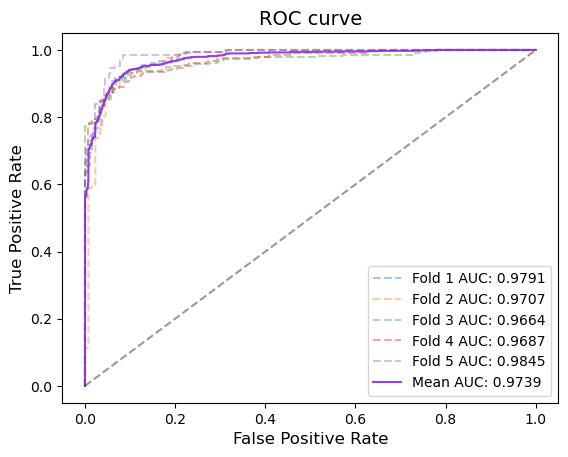

In [5]:
plot_auc_curves(fprs, tprs, auc, directory='result', name='test_auc')

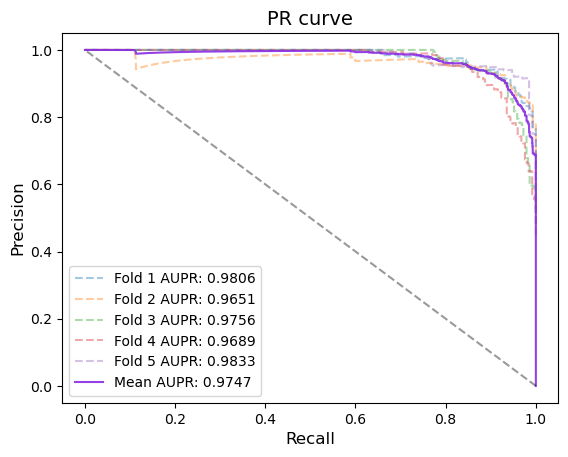

In [6]:
plot_prc_curves(precisions, recalls, prc, directory='result', name='test_prc')